### Library Imports

In [1]:
%matplotlib notebook
import pandas as pd
import matplotlib.pyplot as plt
import os
from itertools import zip_longest
import numpy as np
import seaborn as sns

### Read Data File

In [2]:
nb_name = "1.0-jp-initial-data-exploration"

dataset_1 = 'preprocessed_data_query-sdg-full_20220313.csv' # _1, _2 etc.. as need to list more than one data set being read in

In [3]:
df = pd.read_csv('../../data/processed/'+dataset_1) 

# Pandas will start looking from where your current python file is located. 
# Therefore you can move from your current directory to where your data is located with '..'

C:\Users\jesse\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10,11,26) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head(4)

,articletype_id,ptr_id,sdg_lst,authors,title,content,keywords,date,year,month,...,1_listed_sdg,2_listed_sdg,3_listed_sdg,4_listed_sdg,5_listed_sdg,6_listed_sdg,7_listed_sdg,8_listed_sdg,9_listed_sdg,language
0,13.0,13,"14, 2","['Jansen, Jonathan D.']",Autonomy and accountability in the regulation ...,This article examines the struggles of the Sou...,['accountability' 'autonomy' 'democracy' 'educ...,2006-01-27,2006.0,1.0,...,14,2,0,0,0,0,0,0,0,English
1,14.0,14,2,"['Jansen, Jonathan D.']",Intellectuals under fire,Looks at the status of intellectuals in South ...,['cultural policy' 'democracy' 'intellectuals'...,2006-01-27,2006.0,1.0,...,2,0,0,0,0,0,0,0,0,English
2,16.0,16,2,"['Jansen, Jonathan D.']",Mode 2 knowledge and institutional life: takin...,This paper examines the response of a black un...,['application-based knowledge' 'higher educati...,2006-01-27,2006.0,1.0,...,2,0,0,0,0,0,0,0,0,English
3,17.0,17,"14, 1","['Jansen, Jonathan D.']",Political symbolism as policy craft : explaini...,The policy literature in developing countries ...,['apartheid' 'educational change' 'educational...,2006-01-28,2006.0,1.0,...,14,1,0,0,0,0,0,0,0,English


In [5]:
# check the types of data in the set

df.dtypes

articletype_id    float64
ptr_id              int64
sdg_lst            object
authors            object
title              object
content            object
keywords           object
date               object
year              float64
month             float64
issn               object
doi                object
handle             object
institution_id      int64
institution        object
active             object
no_listed_sdg       int64
1_listed_sdg        int64
2_listed_sdg        int64
3_listed_sdg        int64
4_listed_sdg        int64
5_listed_sdg        int64
6_listed_sdg        int64
7_listed_sdg        int64
8_listed_sdg        int64
9_listed_sdg        int64
language           object
dtype: object

### Check Data Set's Quality

#### Nulls

In [6]:
# Check the number of nulls

df.isnull().sum() # Efficient query for checking the number of nulls accross columns in pandas

articletype_id         0
ptr_id                 0
sdg_lst                0
authors                0
title                  0
content               23
keywords               0
date                   1
year                   1
month                  1
issn              103329
doi               195081
handle                 0
institution_id         0
institution            0
active                 0
no_listed_sdg          0
1_listed_sdg           0
2_listed_sdg           0
3_listed_sdg           0
4_listed_sdg           0
5_listed_sdg           0
6_listed_sdg           0
7_listed_sdg           0
8_listed_sdg           0
9_listed_sdg           0
language          122807
dtype: int64

In [7]:
# Drop na values

df = df.dropna(subset=['sdg_lst','articletype_id'])

#### ID Matches

In [8]:
# does the ptr_id and article_type_id match 

# Find the number of mismatches in id's

len([i for i in list(df.ptr_id == df.articletype_id) if i == False ])

0

#### Listed SDG's

In [9]:
# check that 17 sdg's are represented 

np.sort(df['1_listed_sdg'].unique())

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17],
      dtype=int64)

<IPython.core.display.Javascript object>


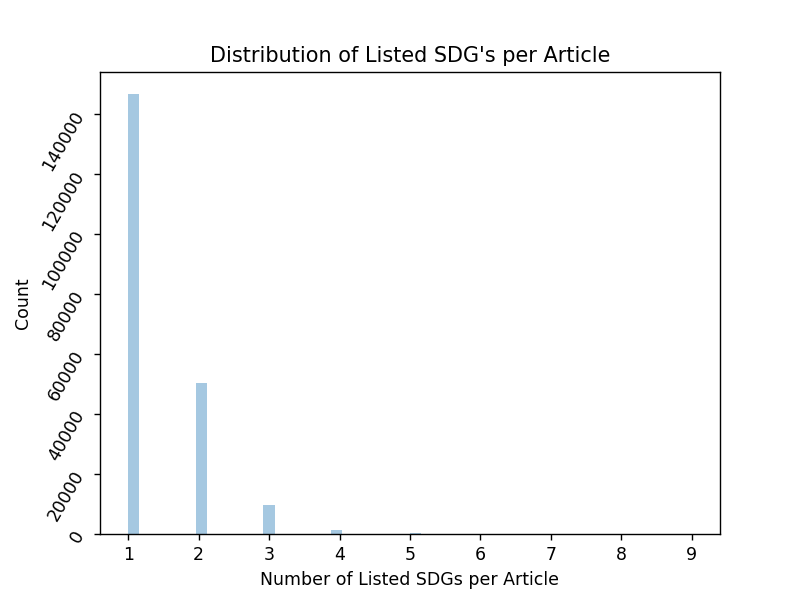

C:\Users\jesse\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


In [10]:
# visualise the distribution 

description = "Number_Listed_SDGs_per_Article" # Note the "" used here

plt.figure(1)
sns.distplot(df.no_listed_sdg,kde=False)
plt.ylabel('Count')
plt.xlabel('Number of Listed SDGs per Article')
plt.title("Distribution of Listed SDG's per Article")
plt.xticks(range(1,10))
plt.yticks(rotation=60)
# plt.savefig("../../reports/figures/exploratory_data_analysis_visualisations/[%s]-[%s]-[%s].png"%(nb_name,\
#                                                                                                  dataset_1,\
#                                                                                                  description))
plt.show()

In [11]:
sdg_counts = list()

for i in range(1,18):
    
    # find all the listed sdg's with the number sdg in them, count them per column, make list and sum the list to get total count 
    
    count = sum(list(df[df[['1_listed_sdg', '2_listed_sdg', '3_listed_sdg', '4_listed_sdg',
                            '5_listed_sdg', '6_listed_sdg', '7_listed_sdg', '8_listed_sdg',
                            '9_listed_sdg']].isin([i])].count()))
    
    sdg_counts.append([i,count])
    
df_x = pd.DataFrame(sdg_counts,columns=['sdg','count'])


<IPython.core.display.Javascript object>


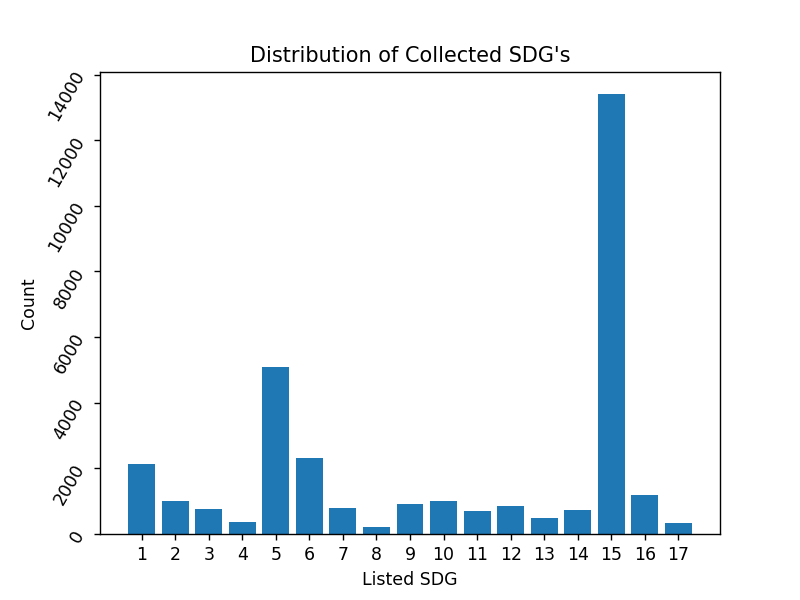

In [21]:
plt.figure(2)
plt.bar(df_x['sdg'],df_x['count'])
plt.ylabel('Count')
plt.xlabel('Listed SDG')
plt.title("Distribution of Collected SDG's")
plt.xticks(range(1,18))
plt.yticks(rotation=60)
# plt.savefig("../../reports/figures/exploratory_data_analysis_visualisations/[%s]-[%s]-[%s].png"%(nb_name,\
#                                                                                                  dataset_1,\
#                                                                                                  description))
plt.show()

In [13]:
year_sdg = list()

for year in np.sort(df['year'].unique()):
    for sdg in range(1,18):
    
        # find all the listed sdg's with the number sdg in them, count them per column, make list and sum the list to get total count 

        count = df[  (df['1_listed_sdg'].isin([sdg])) & (df['year']==year) ]['1_listed_sdg'].count()

        year_sdg.append([year,sdg,count])
        
df_x = pd.DataFrame(year_sdg,columns=['year','sdg','count']).sort_values(['sdg','year'])

<IPython.core.display.Javascript object>


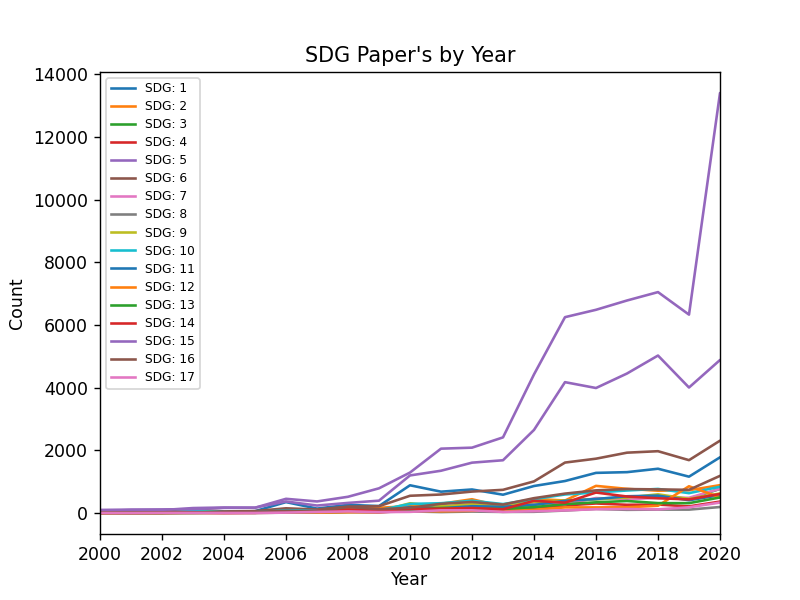

In [20]:
plt.figure(3)

for sdg in df_x.sdg.unique():
    
    sub_df = df_x[df_x['sdg']==sdg]
    
    plt.plot(sub_df.year,sub_df['count'],label='SDG: %s'%(sdg))
    
plt.title("SDG Paper's by Year")
plt.xlabel('Year')
plt.ylabel('Count')
plt.xlim([2000,2020])
plt.xticks(range(2000,2022,2))
plt.legend(fontsize=7)
plt.show()

In [22]:
extracted = []

for i in range(1,18):
    
    cum_sum = 100*(df_x[df_x['sdg']==i]['count'].cumsum() / df_x[df_x['sdg']==i]['count'].sum()).values
    
    years = df_x[df_x['sdg']==i]['year'].values
        
    df_y = pd.DataFrame(columns=['year','sdg','cum_sum'])
    
    df_y['year'] = years
    
    df_y['sdg'] = i
    
    df_y['cum_sum'] = cum_sum
    
    extracted.append(df_y)
    
df_z = pd.concat(extracted)

<IPython.core.display.Javascript object>


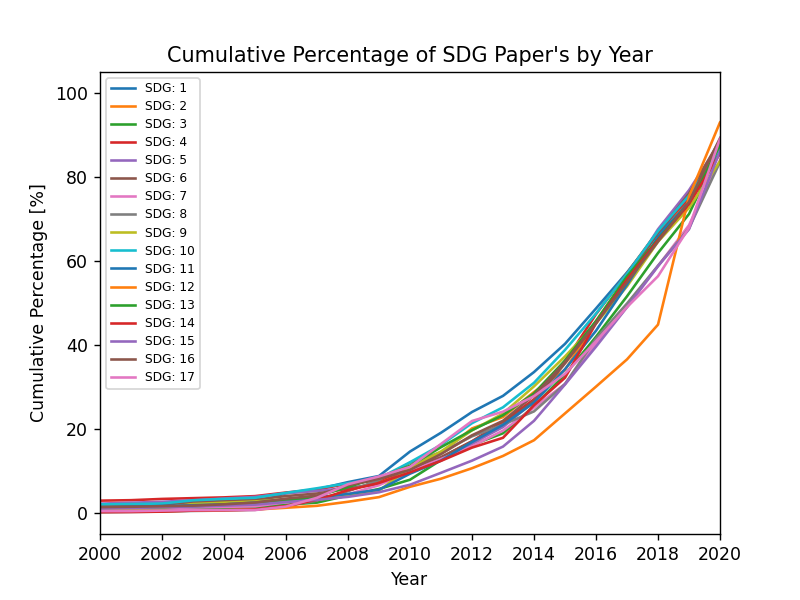

In [24]:
plt.figure(4)

for sdg in df_z.sdg.unique():
    
    sub_df = df_z[df_z['sdg']==sdg]
    
    plt.plot(sub_df.year,sub_df['cum_sum'],label='SDG: %s'%(sdg))
    
plt.title("Cumulative Percentage of SDG Paper's by Year")
plt.xlabel('Year')
plt.ylabel('Cumulative Percentage [%]')
plt.xlim([2000,2020])
plt.xticks(range(2000,2022,2))
plt.legend(fontsize=7)
plt.show()